# EDA
**Project notes** will be collected in the *project_notes.md* file.

## Preparation

### Libraries & Settings

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [73]:
# set options
pd.set_option('display.float_format', '{:,.2f}'.format)

### Data

In [74]:
# read data
df = pd.read_csv("/".join(["../data/raw/", "hr-analytics-prediction", "HR-Employee-Attrition.csv"]))

# read data dictionary
Markdown(filename="../docs/data_dictionary.md")

| column                    | scale      | type | description |
|--------------------------:|:----------:|:----:|:------------|
| Age                       | metric     | int  | Age of the employee |
| Attrition                 | category   | cat  | employee attrition |
| BusinessTravel            | category   | cat  | how frequently an employee travels for business purpose |
| DailyRate                 | metric     | int  | Daily Wage of an employee |
| Department                | category   | cat  | Employee department |
| DistanceFromHome          | metric     | int  | distance from home to office in km |
| Education                 | category   | int  | employee qualification (masked) |
| EducationField            | category   | cat  | Stream of education |
| EmployeeCount             | metric     | int  | Employee count |
| EmployeeNumber            | category   | int  | employee number |
| EnvironmentalSatisfaction | category   | int  | environment |
| Gender                    | binary     | cat  | gender of employee |
| HourlyRate                | metric     | int  | employee hourly rate |
| JobInvolvement            | category   | int  | employee job involvement |
| JobLevel                  | category   | int  | level of job |
| JobRole                   | cat        | cat  | employee job role |
| JobSatisfaction           | category   | int  | is employee satisfied? |
| MaritalStatus             | category   | cat  | employee marital status |
| MonthlyIncome             | metric     | int  | employee monthly income |
| MonthlyRate               | metric     | int  | employee monthly rate |
| NumCompaniesWorked        | metric     | int  | number of companies worked for |
| Over18                    | category   | cat  | age over 18 |
| OverTime                  | category   | cat  | whether employee works overtime |
| PercentSalaryHike         | metric     | int  | salary hike |
| PerformanceRating         | category   | int  | performance rate |
| RelationshipSatisfaction  | category   | int  | relationship satisfaction |
| Standardhours             | metric     | int  | standard work hours per week |
| StockOptionLevel          | category   | int  | company stock option level |
| TotalWorkingYears         | metric     | int  | total working years |
| TrainingTimesLastYear     | metric     | int  | training time |
| WorkLifeBalance           | category   | int  | work life balance |
| YearsAtCompany            | metric     | int  | total years at current company |
| YearsInCurrentRole        | metric     | int  | total years in current role |
| YearsSinceLastPromotion   | metric     | int  | years since last promotion |
| YearsWithCurrentManager   | metric     | int  | years worked under current manager |


### Inspection & overview

In [75]:
# first view
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


In [76]:
#duplicates
df.duplicated().sum()

#duplicates without ID
df.drop("EmployeeNumber", axis=1).duplicated().sum()

np.int64(0)

In [77]:
def overview(df=df):
    display(pd.DataFrame({"dtypes": df.dtypes,
                        "total": df.count(),
                        "missing_n": df.isna().sum(),
                        "missing_%": df.isna().mean(),
                        "uniques_n": df.nunique(),
                        "uniques": [df[col].unique() for col in df.columns]
                        }))

overview()

,dtypes,total,missing_n,missing_%,uniques_n,uniques
Age,int64,1470,0,0.00,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
Attrition,object,1470,0,0.00,2,"[Yes, No]"
BusinessTravel,object,1470,0,0.00,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,1470,0,0.00,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
Department,object,1470,0,0.00,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,1470,0,0.00,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
Education,int64,1470,0,0.00,5,"[2, 1, 4, 3, 5]"
EducationField,object,1470,0,0.00,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,1470,0,0.00,1,[1]
EmployeeNumber,int64,1470,0,0.00,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


In [78]:
# Transform target
df["Attrition"] = df["Attrition"].replace({"Yes": 1, "No": 0}).astype(int)

C:\Users\Christian Roden\AppData\Local\Temp\ipykernel_31064\3244321620.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Attrition"] = df["Attrition"].replace({"Yes": 1, "No": 0}).astype(int)


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,470.00",36.92,9.14,18.00,30.00,36.00,43.00,60.00
Attrition,"1,470.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
DailyRate,"1,470.00",802.49,403.51,102.00,465.00,802.00,"1,157.00","1,499.00"
DistanceFromHome,"1,470.00",9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,"1,470.00",2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,"1,470.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,470.00","1,024.87",602.02,1.00,491.25,"1,020.50","1,555.75","2,068.00"
EnvironmentSatisfaction,"1,470.00",2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,"1,470.00",65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,"1,470.00",2.73,0.71,1.00,2.00,3.00,3.00,4.00


## Plots

In [85]:
# group columns

cats = list(df.select_dtypes(include="object").drop("Over18", axis=1).columns) + ["Education", 
                                                           "EnvironmentSatisfaction", 
                                                           "JonInvolvement", 
                                                           "JobLevel", 
                                                           "JobSatisfaction", 
                                                           "NumCompaniesWorked", 
                                                           "PerformanceRating", 
                                                           "RelationshipSatisfaction", 
                                                           "StockOptionLevel", 
                                                           "TrainingTimesLastYear", 
                                                           "WorkLifeBalance"]

# numerical: Include ordinal ints
nums = list(df.select_dtypes(include="number").drop(["Attrition", "EmployeeCount", "StandardHours"], axis=1).columns)

# kpi: total attrition rate
total_rate = df["Attrition"].mean()

print(cats)
print(nums)
print(total_rate)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JonInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
0.16122448979591836


### Target class distribution

Text(0.5, 1.0, 'Total attrition')

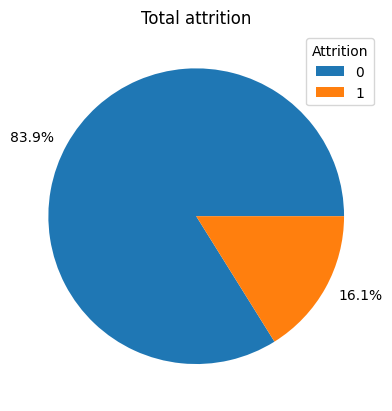

In [81]:
# plot total attrition rate
crosstab = pd.crosstab(df["Attrition"], "Attrition", normalize="columns")
class_rates = crosstab['Attrition']

fig, ax = plt.subplots()
ax.pie(class_rates, labels=[f'{p:.1%}' for p in class_rates])
ax.legend(crosstab.index, title='Attrition', loc='best')
ax.set_title("Total attrition")

# fig.savefig("../images/total_attrition.png")

### Metrics

### Categories